# Principal Component Analysis (PCA) with Python

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

## Data Import: quarries dataset

In [ ]:
data = pd.read_csv('C:/Users/Eugenio_Py/Desktop/Notebooks/datasets/quarries.txt', sep="\t", header=0,index_col=0)

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data

In [ ]:
# Checking the missing values
data.isnull().sum()

In [ ]:
#Let's calculate the percentage of each category.
data.Type.value_counts(normalize=False)

In [ ]:
data["Type"].describe() # what is wrong?

In [ ]:
data["Type"] = data["Type"].astype(str)

In [ ]:
data["Type"].describe() 

In [ ]:
# Boxplot using seaborn
sns.set_style("whitegrid")  
sns.boxplot(x = 'Type', y = 'Fe', data = data);

In [ ]:
# Scatter 2D plot
import plotly.express as px
fig = px.scatter(data, x="Ti", y="Ba",
                 color="Type",
                 hover_name="Type", log_x=False, size_max=10)
fig.show()

In [ ]:
fig = px.scatter_3d(data, x="Fe", y="Ti", z = "Ba",
                 color="Type")
fig.show()

In [ ]:
data.head()

In [ ]:
# select only numerical attributes
X = data.iloc[:, 1:11]
X

In [ ]:
# autoscale the data
from sklearn.preprocessing import scale
X = scale(X.values)
X

In [ ]:
# This is called parallel coordinates plot
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=120)
fig = pd.plotting.parallel_coordinates( data, 'Type', color=('red', 'blue','green','yellow'));
fig;

In [ ]:
# Prepare the dataset for autoscaled data
data_autosc = pd.DataFrame(X)
data_autosc.columns = data.columns[1:11]
data_autosc.index = data.index
data_autosc.head()
data_autosc['Type'] = data.Type
data_autosc.head()

In [ ]:
# This is called parallel coordinates plot
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=120)
fig = pd.plotting.parallel_coordinates(data_autosc, 'Type', color=('red', 'blue','green','yellow'));
fig;

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
pca

In [ ]:
Principal_components=pca.fit_transform(X)

In [ ]:
# Scores
scores = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])
print(scores)

In [ ]:
# Scores - for graphs
scores = pd.concat([scores, data.Type], axis = 1)
print(scores)

In [ ]:
# Scree plot
import matplotlib
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
   
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

In [ ]:
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.show()

In [ ]:
print(pca.explained_variance_) 

In [ ]:
plt.plot(PC_values, np.cumsum(pca.explained_variance_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [ ]:
pca = decomposition.PCA(n_components=4)
Principal_components=pca.fit_transform(X)
scores = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
scores.index = data.index
scores = pd.concat([scores, data.Type], axis = 1)
print(scores)

In [ ]:
# Loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=data.columns[1:11])
loadings["Attributes"] = loadings.index
loadings

In [ ]:
#Scores plot
import plotly.express as px
fig = px.scatter(scores, x="PC1", y="PC2", color="Type", hover_data=['Type'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [ ]:
fig = px.scatter(loadings, x="PC1", y="PC2",text="Attributes")
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text='Loadings Plot')
fig.show()

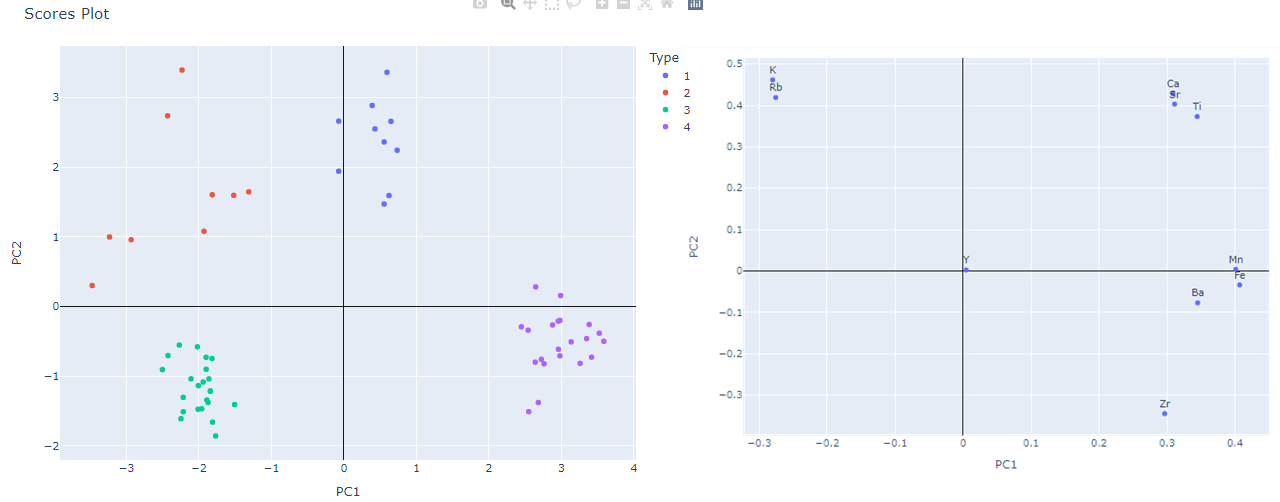

In [ ]:
# Boxplot using seaborn
sns.set_style("whitegrid")  
sns.boxplot(x = 'Type', y = 'K', data = data);

## Hotelling's T2 vs Q-residuals

In [ ]:
# Get PCA scores
T = scores.iloc[:,1:4]
# Get PCA loadings
P = loadings.iloc[:,0:3]
# Calculate error array
Err = X - np.dot(T,P.T)
# Calculate Q-residuals (sum over the rows of the error array)
Q = np.sum(Err**2, axis=1)
# Calculate Hotelling's T-squared (note that data are normalised by default)
Tsq = np.sum((T/np.std(T, axis=0))**2, axis=1)

# set the confidence level
conf = 0.95
ncomp = 3
 
from scipy.stats import f

# Calculate confidence level for T-squared from the ppf of the F distribution
Tsq_conf =  f.ppf(q=conf, dfn=ncomp, \
            dfd=X.shape[0])*ncomp*(X.shape[0]-1)/(X.shape[0]-ncomp)
# Estimate the confidence level for the Q-residuals
i = np.max(Q)+1
while 1-np.sum(Q>i)/np.sum(Q>0) > conf:
    i -= 1
Q_conf = i

# Create a dataframe using only T2 and Q-residuals
hot_q_data = {'T2': Tsq, 'Qres': Q, 'Type': data.Type}  
hot_q_data = pd.DataFrame(hot_q_data, index = data.index)
hot_q_data

In [ ]:
# Plot the Hotelling T2 vs Q-residuals plot
fig = px.scatter(hot_q_data, x="T2", y="Qres", hover_data={'Sample': (hot_q_data.index)})#, color = "Class")
fig.add_hline(y=Q_conf,line_dash="dot", line_color='Red')
fig.add_vline(x=Tsq_conf,line_dash="dot", line_color='Red')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=800,
    title_text="Hotelling's T2 vs Q-residuals")
fig.show()